In [10]:
%matplotlib inline
%run data_load/solomon_load.py
import pandas as pd
import json
import scipy.stats
import datetime

In [2]:
data_array = []
for i in range(1, 13):
    data_array.append(read_data(f'slow_queries_inputs/{i}.json'))
data_array

[[{'df':                      values
   2019-10-19 20:05:00  812.20
   2019-10-19 20:06:00  781.00
   2019-10-19 20:07:00  749.80
   2019-10-19 20:08:00  718.60
   2019-10-19 20:09:00  687.40
   ...                     ...
   2019-10-24 23:31:00  415.76
   2019-10-24 23:32:00  406.12
   2019-10-24 23:33:00  396.48
   2019-10-24 23:34:00  386.84
   2019-10-24 23:35:00  377.20
   
   [7411 rows x 1 columns],
   'alerts': [{'end': Timestamp('2019-10-22 05:50:00'),
     'start': Timestamp('2019-10-22 05:05:00'),
     'status': 'warning',
     'type': 'possible'},
    {'end': Timestamp('2019-10-24 21:00:00'),
     'start': Timestamp('2019-10-24 03:00:00'),
     'status': 'warning',
     'type': 'strict'}],
   'labels': {'sensor': 'test_sensor'},
   'alias': 'Real fuckup on main_shard0 24.10.19',
   'kind': None,
   'type': None}],
 [{'df':                      values
   2019-11-16 15:05:00     0.0
   2019-11-16 15:06:00     0.0
   2019-11-16 15:07:00     0.0
   2019-11-16 15:08:00     0.0
 

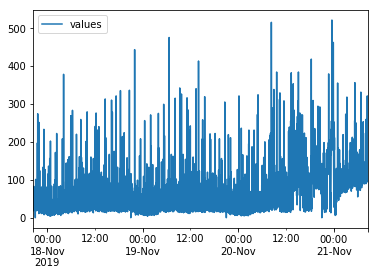

In [12]:
data_fuckup = data_array[6][0]['df']
data_fuckup.plot()

In [13]:
lst = []
for date_day in [19, 20, 21]:
    for window_len in ['15min', '30min', '1h', '2h']:
        date_start = datetime.datetime(2019, 11, date_day, 0, 0, 0)
        date_end = date_start + pd.to_timedelta(window_len)
        window = data_fuckup['values'].loc[date_start:date_end]
        window2 = data_fuckup['values'].loc[date_start - pd.to_timedelta('1d'):date_end - pd.to_timedelta('1d')]
        d, p = scipy.stats.ks_2samp(window, window2, mode='asymp')
        lst.append({'window': list(window), 'window2': list(window2), 'd': d, 'p': p})
with open('ks_test_data.json', 'w') as f:
    json.dump(lst, f)
!cat ks_test_data.json

[{"window": [17.0, 23.0, 25.0, 23.0, 20.0, 16.0, 77.0, 8.0, 8.0, 12.0, 16.0, 9.0, 7.0, 109.0, 62.0, 17.0], "window2": [29.0, 27.0, 27.0, 41.0, 12.0, 8.0, 68.0, 18.0, 115.0, 8.0, 10.0, 18.0, 28.0, 6.0, 10.0, 16.0], "d": 0.25, "p": 0.6993741991310154}, {"window": [17.0, 23.0, 25.0, 23.0, 20.0, 16.0, 77.0, 8.0, 8.0, 12.0, 16.0, 9.0, 7.0, 109.0, 62.0, 17.0, 18.0, 20.0, 18.0, 26.0, 24.0, 10.0, 6.0, 7.0, 26.0, 16.0, 15.0, 10.0, 125.0, 256.0, 27.0], "window2": [29.0, 27.0, 27.0, 41.0, 12.0, 8.0, 68.0, 18.0, 115.0, 8.0, 10.0, 18.0, 28.0, 6.0, 10.0, 16.0, 38.0, 34.0, 21.0, 14.0, 11.0, 136.0, 21.0, 13.0, 12.0, 13.0, 19.0, 16.0, 66.0, 62.0, 31.0], "d": 0.22580645161290314, "p": 0.4080952257334689}, {"window": [17.0, 23.0, 25.0, 23.0, 20.0, 16.0, 77.0, 8.0, 8.0, 12.0, 16.0, 9.0, 7.0, 109.0, 62.0, 17.0, 18.0, 20.0, 18.0, 26.0, 24.0, 10.0, 6.0, 7.0, 26.0, 16.0, 15.0, 10.0, 125.0, 256.0, 27.0, 13.0, 21.0, 20.0, 17.0, 44.0, 74.0, 8.0, 10.0, 16.0, 26.0, 11.0, 92.0, 8.0, 84.0, 17.0, 19.0, 31.0, 25.0, 16